## The following analysis was done by:
<div class="alert alert-block alert-info">
<b>Name:</b> Abed AlRahman Naser  
    
<b> ID: </b> 11715071             
</div>
<div class="alert alert-block alert-info">
<b>Name:</b> Serin Ahmad      
    
<b> ID: </b> 11822705
</div>
<div class="alert alert-block alert-info">
<b>Name:</b> Sami Imran  
    
<b> ID: </b> 11820884
</div>


# EDA on Trending YouTube Videos Statistics

__The data that analysis based on has been taken from Kaggle ( Home of data science projects ) , linked below. Done for a Data Science course task.__

__Course instructor: Prof.Abdel-Razzak Natsheh__

__Go to Kaggle ==> https://www.kaggle.com/datasnaek/youtube-new__

__Using python libraries, by analysing a huge dataset which contains approximately 40,000 records, taking Britain records, we've succeeded in analysing what factors affect how popular a YouTube video will be. We've done statistical analysis over time as well. All those have been worked by using the different videos features included in the dataset.__

***

# __In this EDA we will present the following:__
### - The relation between likes and views.
### - The relation between dislikes and views.

#### In both cases:

#### 1- When comments are enabled.
 
#### 2- When comments are disabled.

### - Categories that have the most trending videos.
 
### - The relations between categories, rating and comments.

### - How could IDLE time affect on trend duration.

***

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
#reading Britain data into a data frame
GB_data=pd.read_csv("GBvideos.csv")
GB_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [322]:
#This dictionary contaion the categories. The keys are the categories id's and the values are the categories names.

C_ID={1:"Film & Animation",2:"Autos & Vehicles",10:"Music",15:"Pets & Animals",17:"Sports",18:"Short Movies",19:"Travel & Events",20:"Gaming",21:"Videoblogging",22:"People & Blogs"
     ,23:"Comedy",24:"Entertainment",25:"News & Politics",26:"Howto & Style",27:"Education",28:"Science & Technology",30:"Movies",31:"Anime/Animation",32:"Action/Adventure",33:"Classics"
     ,34:"Comedy",35:"Documentary",36:"Drama",37:"Family",38:"Foreign",39:"Horror",40:"Sci-Fi/Fantasy",41:"Thriller",42:"Shorts",43:"Shows",44:"Trailers",29:"Nonprofits & Activism"}

***

<div class="alert alert-block alert-warning">
    <b> <h3> We want to take videos that enables ratings so we can work on it.</h3> </b>
</div>

In [323]:
#making a data frame of the videos that have the rating disabled
sorted_likes = GB_data[GB_data.ratings_disabled == False]

                      Figure1


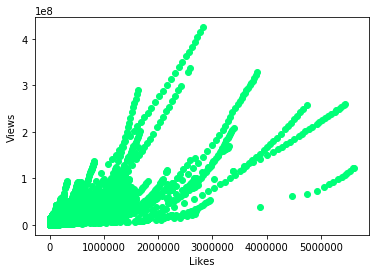

In [324]:
plt.scatter( sorted_likes['likes'],sorted_likes['views'],c='#00ff77')
plt.xlabel("Likes")
plt.ylabel("Views")
print("                      Figure1")
plt.show()

In [325]:
corr1=GB_data['likes'].corr(GB_data['views'])

<div class="alert alert-block alert-success">
<b>The correlation between the likes and the views is  0.795861515184151
</b>
</div>

<div class="alert alert-block alert-danger">
<b><h3> It is clear in Figure1 that the relation between likes and views is strongly positive since the correlation between them is 0.7958 which is so close to 1.00 </h3></b>
</div>

                      Figure2


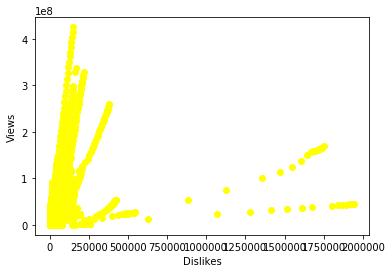

In [326]:
plt.scatter( sorted_likes['dislikes'],sorted_likes['views'],c='#ffff00')
plt.xlabel("Dislikes")
plt.ylabel("Views")
print("                      Figure2")

plt.show()

In [327]:
corr1=GB_data['dislikes'].corr(GB_data['views'])

<div class="alert alert-block alert-success">
<b>The correlation between the dislikes and the views is  0.3924069757807082
</b>
</div>

<div class="alert alert-block alert-danger">
<b><h3> Figure 2 shows that the relation between dislikes and views is not as strong as the one shown in Figure1.
    The correlation calculated is 0.3924 which is not even close to 1.00 </h3></b>
</div>

***

<div class="alert alert-block alert-warning">
    <b> <h3> Now, let's see disabled-comments videos.</h3> </b>
</div>

                      Figure3


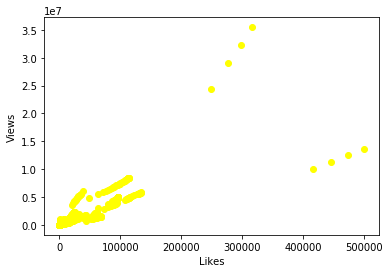

In [328]:
not_rated_videos = GB_data[GB_data.comments_disabled == True] 
not_rated_videos = not_rated_videos[not_rated_videos.ratings_disabled == False]

plt.scatter( not_rated_videos['likes'],not_rated_videos['views'],c='#ffff00')
plt.xlabel("Likes")
plt.ylabel("Views")
print("                      Figure3")

plt.show()

In [329]:
corr1=not_rated_videos['likes'].corr(not_rated_videos['views'])
corr1

0.8096123577619884

<div class="alert alert-block alert-success">
<b>The correlation between the likes and the views is 0.8096123577619884
</b>
</div>

<div class="alert alert-block alert-danger">
<b><h3> It is clear in Figure3 that the relation between likes and views is strongly positive since the correlation between them is 0.809 which is so close to 1.00 </h3></b>
</div>

                      Figure4


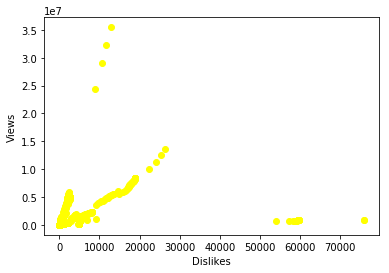

In [330]:
not_rated_videos = GB_data[GB_data.comments_disabled == True] 
not_rated_videos = not_rated_videos[not_rated_videos.ratings_disabled == False]

plt.scatter( not_rated_videos['dislikes'],not_rated_videos['views'],c='#ffff00')
plt.xlabel("Dislikes")
plt.ylabel("Views")
print("                      Figure4")

plt.show()

In [331]:
corr1=not_rated_videos['likes'].corr(not_rated_videos['dislikes'])
corr1

0.1260559507307721

<div class="alert alert-block alert-success">
<b>The correlation between the likes and the dislikes in videos that has the comment section off is  0.1260559507307721
</b>
</div>

<div class="alert alert-block alert-danger">
<b><h3> Figure 4 shows that the relation between likes and dislikes is not as strong as the one shown in Figure3.
    The correlation calculated is 0.126 which is not even close to 1.00 </h3></b>
</div>

***

 # • Categories that have the most trending videos

In [332]:
#creating a dict which conations the count of videos went on trend in every category
CT_dict={'counts':GB_data.category_id.value_counts()}
CT_df=pd.DataFrame(CT_dict)
counter = int(0)

for i in CT_df.counts:
    counter = counter+1
    
inx = np.arange(0,counter)
indeces=CT_df.index
CT_df['category']=indeces
CT_df['i']=inx
CT_df=CT_df.set_index('i')


In [333]:
#adding category name section to both the categories and the full data set data frames
CT_df['category_name']=("")

#looping over the indeces to set the category name
for n in CT_df.index:
    CT_df.loc[n,['category_name']] = C_ID[int(CT_df.loc[n,['category']])]

GB_data['category_name']=("")
#looping over the indeces to set the category name

for n in GB_data.index:
    GB_data.loc[n,['category_name']] = C_ID[int(GB_data.loc[n,['category_id']])]    
CT_df

,counts,category,category_name
i,,,
0,13754,10,Music
1,9124,24,Entertainment
2,2926,22,People & Blogs
3,2577,1,Film & Animation
4,1928,26,Howto & Style
5,1907,17,Sports
6,1828,23,Comedy
7,1788,20,Gaming
8,1225,25,News & Politics


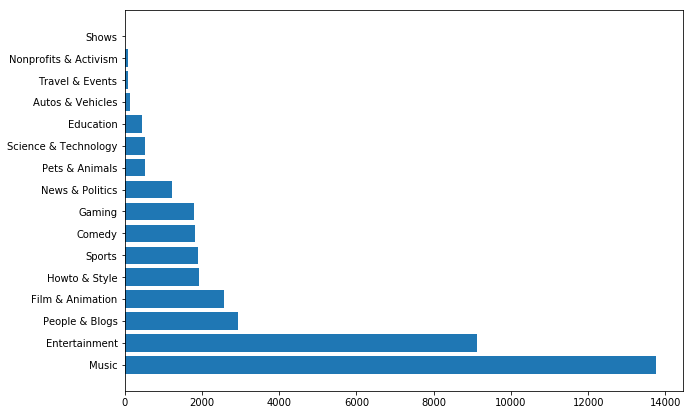

In [334]:
#plotting the categories and the number of videos on trend
height = CT_df.counts
bars = CT_df.category_name
y_pos = np.arange(len(bars))
plt.figure(figsize=(10,7))
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()


***

# • The relations between categories, rating and comments.

In [335]:
#finding the ratio between likes and dislikes
like_dislike_ratio = GB_data.groupby('category_name')['likes'].agg('sum') / GB_data.groupby('category_name')['dislikes'].agg('sum')
from IPython.display import HTML, display

display (HTML(
       "<h2 ><font color='#8e046c' >  Likes & Dislikes Ratio among Categories</font>    </h2>"
))
like_dislike_ratio=like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio=like_dislike_ratio.set_index('category_name')
like_dislike_ratio=like_dislike_ratio.rename(columns={0: 'ratio'})
like_dislike_ratio

,ratio
category_name,
Shows,130.822076
Pets & Animals,41.764667
Howto & Style,31.956551
Comedy,30.962429
Gaming,30.430404
Education,29.616969
Travel & Events,26.753478
Film & Animation,23.804328
Music,23.486149


In [336]:
#finding the ratio between views and comment count
views_comment_ratio = GB_data.groupby('category_name')['views'].agg('sum') / GB_data.groupby('category_name')['comment_count'].agg('sum')
display (HTML(
       "<h2 ><font color='#8e046c' >  Views-Comments Ratio among Categories</font>    </h2>"
))
views_comment_ratio = views_comment_ratio.sort_values(ascending=False).reset_index()
views_comment_ratio=views_comment_ratio.set_index('category_name')
views_comment_ratio=views_comment_ratio.rename(columns={0: 'ratio'})
views_comment_ratio

,ratio
category_name,
Travel & Events,1123.611134
Music,584.140577
Film & Animation,536.414479
Autos & Vehicles,424.056375
Science & Technology,407.386889
Pets & Animals,385.364379
Shows,353.067468
Sports,332.305200
People & Blogs,307.499707


In [337]:
#finding the ratio between dislikes and views
view_dislike_ratio = GB_data.groupby('category_name')['dislikes'].agg('sum') / GB_data.groupby('category_name')['views'].agg('sum')
view_dislike_ratio = view_dislike_ratio.sort_values(ascending=False).reset_index()
view_dislike_ratio=view_dislike_ratio.set_index('category_name')
view_dislike_ratio=view_dislike_ratio.rename(columns={0: 'ratio'})
display (HTML(
       "<h2 ><font color='#8e046c' >  Dislikes-Views Ratio among Categories</font>    </h2>"
))
view_dislike_ratio

,ratio
category_name,
Nonprofits & Activism,0.015411
Sports,0.002967
Entertainment,0.002958
News & Politics,0.002683
People & Blogs,0.002086
Howto & Style,0.001350
Education,0.001335
Gaming,0.001319
Autos & Vehicles,0.001313


In [338]:
#finding the ratio between likes and views
view_like_ratio = GB_data.groupby('category_name')['likes'].agg('sum') / GB_data.groupby('category_name')['views'].agg('sum')
view_like_ratio = view_like_ratio.sort_values(ascending=False).reset_index()
view_like_ratio.columns = ['category','ratio']
view_like_ratio=view_like_ratio.set_index('category')
display (HTML(
       "<h2 ><font color='#8e046c' >  Likes-Views Ratio among Categories</font>    </h2>"
))
view_like_ratio

,ratio
category,
Nonprofits & Activism,0.069310
Howto & Style,0.043154
Gaming,0.040149
Education,0.039540
Comedy,0.036186
Shows,0.029274
Pets & Animals,0.028243
Entertainment,0.024987
People & Blogs,0.023530


   <font color="#776384">

<h1><font color="#5b4b66"> Conclusion: </font>  </h1>
    
* __After calculating the ratio between like and dislikes among videos categories, we were confused by "Shows" category's ratio which was very high compared with others. Then, we found out that that data was only for one video, so we decided not to consider it in our analysis.__ </font>

    


In [339]:
#showing that there is only one video in "Shows" category
GB_data[GB_data.category_name=='Shows']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
35574,JtIY1Naxg0M,18.26.05,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",876996,34615,234,3448,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...,Shows
35748,JtIY1Naxg0M,18.27.05,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",987708,36543,250,3535,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...,Shows
35922,JtIY1Naxg0M,18.28.05,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1080101,37899,264,3616,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...,Shows
36092,JtIY1Naxg0M,18.29.05,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1154486,39218,281,3750,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...,Shows
36261,JtIY1Naxg0M,18.30.05,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1217887,40063,293,3823,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...,Shows
36443,JtIY1Naxg0M,18.31.05,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1304684,41227,302,3966,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...,Shows
36616,JtIY1Naxg0M,18.01.06,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1360139,41532,308,4000,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...,Shows
36792,JtIY1Naxg0M,18.02.06,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1410105,41945,316,4061,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...,Shows
36962,JtIY1Naxg0M,18.03.06,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1452779,42322,320,4079,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...,Shows
37126,JtIY1Naxg0M,18.04.06,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1486979,42671,328,4108,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...,Shows


<font color="#776384">

* __Gaming is one of the most interesting and common hobby these days, regarding that, "likes-dislikes" ratio is high as we calculated__

</font>

<img src="https://i.ytimg.com/vi/_8VHAHoCUVY/default.jpg
" alt=" " style="width:200px;height:100px;">
<img src="https://i.ytimg.com/vi/0-VAnh7r-_8/default.jpg
" alt=" " style="width:200px;height:100px;">
<img src="https://i.ytimg.com/vi/akohTFyGu88/default.jpg
" alt=" " style="width:200px;height:100px;">
<img src="https://i.ytimg.com/vi/QKn9yiLVlMM/default.jpg
" alt=" " style="width:200px;height:100px;">

<font color="#776384">
    
* __Sports videos have a low "likes-dislikes" ratio. Though there is a large number of sports fans, plastic fans and haters are enough to raise the number of dislikes.__ 
</font>


<img src="https://www.nydailynews.com/resizer/px2Qi9_nIzzQBdRPGa_5b20FQ8s=/1200x0/www.trbimg.com/img-5c5222f3/turbine/ny-sports-tom-brady-sam-darnold-mehta-20190130
" alt=" " style="width:400px;height:300px;">


In [340]:
#the most disliked video in the data set
GB2=GB_data.sort_values('dislikes',ascending=False)
GB2.head(1)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
12784,QwZT7T-TXT0,18.18.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",45349447,1572111,1944971,1626501,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN,Entertainment


In [347]:
#this code segment is to calculate the ratio between the likes and dislikes for the most dislikes video
d = int(GB2.loc[0,['dislikes']])
c = int(GB2.loc[0,['comment_count']])
print("The ratio between dislikes and comment count of the most disliked video is",d/c)

The ratio between dislikes and comment count of the most disliked video is 1.0810212047684356


<img src="https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg	
" alt=" " style="width:200px;height:100px;">

<bold><font color="#776384">
__"So Sorry" video has the highest dislikes count in this dataSet. Regarding that, we found out that the video was about an apology for a mean behavior, but people didn't accept it so the number of dislikes has reached that high number. So the comments has to be in a large number then.__ 
</font></bold>
    

***


# • How could IDLE time affect on trend duration 

In [342]:
#creating the data frame
timings = pd.DataFrame({'video_id': GB_data.video_id ,
                        'trending_date': pd.to_datetime(GB_data['trending_date'],errors='coerce', format='%y.%d.%m'),
                        'publish_time': pd.to_datetime(GB_data['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')
                       })
timings.reset_index()
#converting publish time to date
timings['publish_time'] = timings['publish_time'].dt.date
#sorting dates
timings=timings.sort_values('trending_date')
#keeping only the first record of every video to take the first date of trend
timings = timings.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='first').set_index('video_id')

timings['trend_duration'] = 0
#calculating the trending duration of every video
for x in timings.index:
    timings.loc[x,'trend_duration'] = len(GB_data[GB_data.video_id == x ])

In [343]:
timings['idle_time'] = 0 
#calculating the idle time of every video
timings['idle_time'] = timings['trending_date'].astype('datetime64[ns]')-my_df['publish_time'].astype('datetime64[ns]')
#converting it into floats
timings['idle_time']=timings['idle_time'].astype('timedelta64[D]')
timings.head()

,index,trending_date,publish_time,trend_duration,idle_time
video_id,,,,,
Jw1Y-zhQURU,0,2017-11-14,2017-11-10,14,4.0
aaOB-ErYq6Y,99,2017-11-14,2017-11-07,7,7.0
n1WpP7iowLc,2,2017-11-14,2017-11-10,14,4.0
PUTEiSjKwJU,3,2017-11-14,2017-11-13,14,1.0
rHwDegptbI4,4,2017-11-14,2017-11-13,1,1.0


<div class="alert alert-block alert-info">
<b>Note:</b>
    
   trending_date : the date when a video first shown up on trend.
    
   publish_time : the time when a video was pulished.
    
   trend_duration : the duration a video stay on trend.
    
   idle_time : the interval between publish time and trend date of a video.
</div>

Text(0.5, 1.0, 'The correlation between Idle Time and Trend Duration')

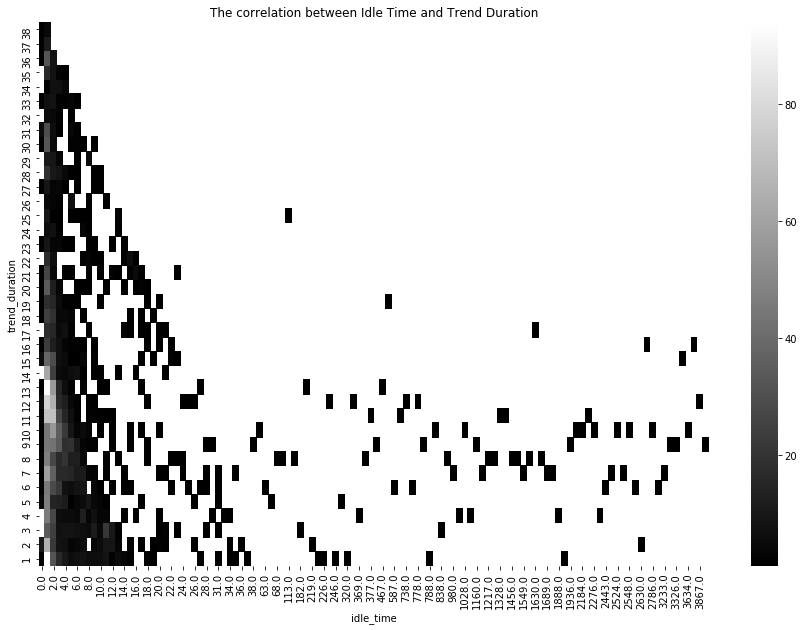

In [344]:
timings['idle_time'] = timings['idle_time']
clean_data= timings.groupby(['trend_duration','idle_time']).count()['index'].unstack()
plt.figure(figsize=(15,10))
ax = sns.heatmap(clean_data, cmap='gist_gray')
ax.invert_yaxis()
plt.title("The correlation between Idle Time and Trend Duration")

# Conclusion:
* ### __As we concluded by analyzing the plot above, idel time has a strong relationship with trend duration. This inverse relationship shows, the shorter idle time, the longer trend duration.__

* ### __The relationship above was concentrated in (0-10) idle time and (1-38) trend duration. Videos that have taken from 0 to 10 days to get on trending stayed from 1 to over 35 days on.__
* ### __Videos that stay on idle for more than 2 months, it usually won't stay more than two weeks on trend.__

***

# Final conclusion "SUMMARY":
* #### A single video's feature dosen't play a role in video trending, consedring the following indicators:

1- If we want to consider "likes" or "dislikes" as a curical feature to let the video trend, there is a lot of videos that have disabled the rating feild.

2- Also, "comments" are not a gauge to let the video trend, a large ratio of videos have a "disabled comments" feild.
 
* #### Thumbnail and title play curical role in making a video trend. Thumbnail sometime is clickbaited ( clickbaited is when something is fake to attract users ).

* #### Tags and titles are very important to make a video show up in the top of the search bar and the search results.

* #### The shorter a video takes to be on trend, the longer it stays on it.



__The previous factors will increase the nubmer of views for a video in a short time, which makes it show up on the trend page.__



# Thank you for considering our analysis 

## We hope it was useful, clear and considerable. Please if you have any notes or questions, let us know 

Don't forget to like, share and subscribe if you liked the video :P